# Recuperatorio Estadistica

In [1]:
# Alumno: Andres Montes de Oca
# Materia: Estadistica
# Fecha Inicio: 08/02/2023

In [2]:
from IPython.display import Image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st
import random

pd.set_option('display.max_columns', None)

## Ejercicio #1 - Estadistica Descriptiva

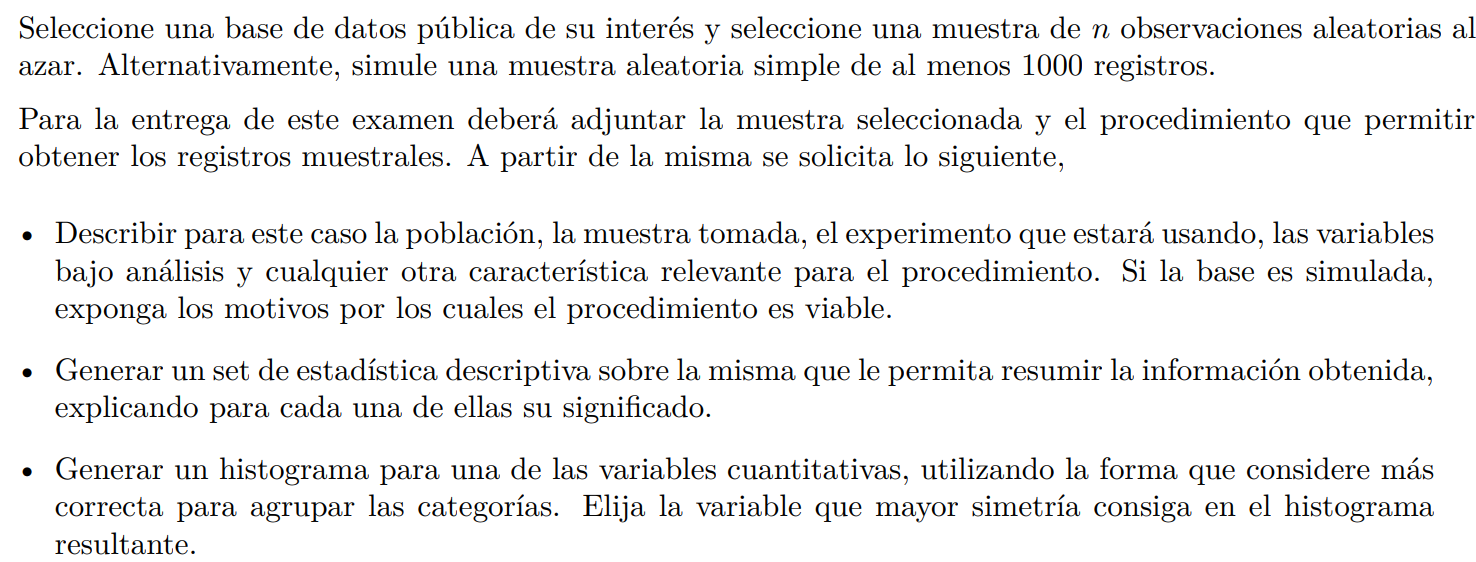

In [3]:
display(Image('Data/1.png'))

##### Importamos el Dataset, y generamos las muestras

In [30]:
# Dataset para trabajar
data = pd.read_csv('Data/data.csv')
print('Cantidad de Registros de la Poblacion:', data.shape[0])

# Muestra #1: Entre 1 y Cant Max de Registros (sin reemplazo)
cant_obs_1 = random.randint(1, data.shape[0])
print('Cantidad de Observaciones para Muestra #1:', cant_obs_1)
sample_1 = data.sample(n=cant_obs_1, replace=False)

# Muestra #2: Entre 1000 y Cant Max de Registros (sin reemplazo)
cant_obs_2 = random.randint(1000, data.shape[0])
print('Cantidad de Observaciones para Muestra #2:', cant_obs_2)
sample_2 = data.sample(n=cant_obs_2, replace=False)


Cantidad de Registros de la Poblacion: 7043
Cantidad de Observaciones para Muestra #1: 3757
Cantidad de Observaciones para Muestra #2: 2159


* Poblacion: Todos los usuarios de una empresa de telecomunicaciones (7043)
* Muestra: Se realiza un muestro aleatorio que contenga al menos 1000 usuarios
* Variables: 
    - customerID: Identificador del cliente
    - gender: Sexo (boolean)
    - SeniorCitizen: Si es Jubilado (boolean)
    - Partner: Si esta en pareja (boolean)
    - Dependents: Si tiene hijos (boolean)
    - tenure: Cantidad de meses de antiguedad (discrete)
    - PhoneService: Si tiene linea de telefono (boolean)
    - InternetService: Tipo de Servicio de Internet Contratatado (ordinal)
    - PaymentMethod: Modo de Pago (nominal)
    - MonthlyCharges: Promedio de Gasto Mensual (continuos)
    - Churn: Si el cliente se dio de baja (target)

###### Analisis Descriptivo

In [46]:
# Ignoramos la variable customerID del analisis
display(data.drop(columns='customerID').describe(include='all'))
print('Servicios de Internet:\n', data.InternetService\
      .value_counts(normalize=True).round(2), '\n')
print('Medios de Pago:\n', data.PaymentMethod\
      .value_counts(normalize=True).round(2))

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,InternetService,PaymentMethod,MonthlyCharges,Churn
count,7043,7043.000000,7043,7043,7043.000000,7043,7043,7043,7043.000000,7043
unique,2,NaN,2,2,NaN,2,3,4,NaN,2
top,Male,NaN,No,No,NaN,Yes,Fiber optic,Electronic check,NaN,No
freq,3555,NaN,3641,4933,NaN,6361,3096,2365,NaN,5174
mean,NaN,0.162147,NaN,NaN,32.371149,NaN,NaN,NaN,64.761692,NaN
std,NaN,0.368612,NaN,NaN,24.559481,NaN,NaN,NaN,30.090047,NaN
min,NaN,0.000000,NaN,NaN,0.000000,NaN,NaN,NaN,18.250000,NaN
25%,NaN,0.000000,NaN,NaN,9.000000,NaN,NaN,NaN,35.500000,NaN
50%,NaN,0.000000,NaN,NaN,29.000000,NaN,NaN,NaN,70.350000,NaN
75%,NaN,0.000000,NaN,NaN,55.000000,NaN,NaN,NaN,89.850000,NaN


Servicios de Internet:
 Fiber optic    0.44
DSL            0.34
No             0.22
Name: InternetService, dtype: float64 

Medios de Pago:
 Electronic check             0.34
Mailed check                 0.23
Bank transfer (automatic)    0.22
Credit card (automatic)      0.22
Name: PaymentMethod, dtype: float64


* gender:
    - Solo dos valores, Male y Female
    - %50.5 son Hombres, %49.5 son mujeres
* SeniorCitizen:
    - Solo 1142 jubilados, que representan un %16.21 del total
* Partner:
    - La Proporcion de solteros es levemente mayor, %51.7 vs %48.3 en pareja
* Dependents:
    - Mas del 70% de los clientes no tiene hijos
* tenure:
    - La Mediana de antiguedad en meses es de 29, sin embargo el promedio es de mas de 32. Esto significa que son mas los clientes que se quedan 29 meses o mas, generando un skew hacia la derecha de la distribucion
* PhoneService:
    - Mas del 90% de los usuarios disponen de al menos una linea telefonica
* InternetService:
    - El %44 de los usuarios tienen contratado el servicio de Fibra Optica, el %34 de DSL, y el %22 no posee contratado ningun servicio de acceso a Internet
* PaymentMethod:
    - El %34 abona el servicio mediante Cheques Electronicos, el %23 mediante cheques fisicos, un %22 por Transferencias Bancarias, y el restante %22 mediante Tarjetas de Credito
* MonthlyCharges:
    - El promedio mensual de gastos es de $64.76
* Churn:
    - El %26.54 de los clientes terminan abandonando la compania

###### Histograma de la variable tenure

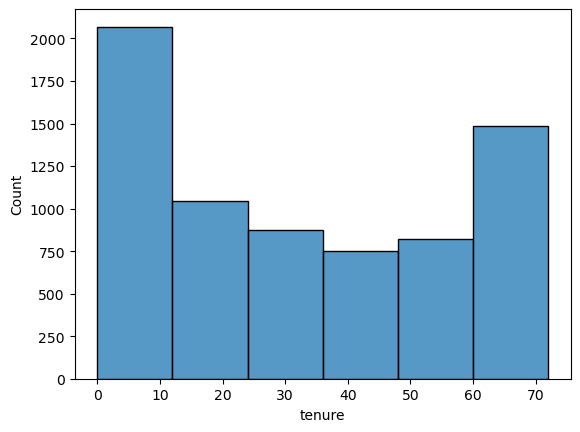

In [81]:
sns.histplot(data=data, x='tenure', binwidth=12)
plt.show()

* Categorizamos segun la cantidad de anos (12 meses) de antiguedad